About Dataset

This innovative dataset is gathered from a Portuguese banking institution's direct marketing campaigns to identify customers who are likely to subscribe to a term deposit, with the ultimate goal of maximizing their conversion rates. With the utilization of telephonic marketing campaigns, this bank has sought out information on individual selection characteristics such as age, job type, marital status, educational level, default history and banking balances that could potentially bring insight into what renders somebody more or less likely to subscribe. The dataset produced provides detailed data on customer contact day and duration in order to answer questions surrounding customer inclination towards the term deposit offers made in these telemarketing campaigns. Furthermore it also considers previous outcomes from similar calls with the same customer as part of its featureset. With all this knowledge at hand we are thus presented with an opportunity to drastically augment conversion success rate through learning which factors yield positive results when attempting to attract new customers for this particular product offering

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


In [8]:
# Load the dataset
df = pd.read_csv('Predicting Portuguese Bank Term Deposit.csv')  # Adjust delimiter if necessary

# Display the first few rows of the dataset
print(df.head())


   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  


In [9]:
# Checking for missing values
print(df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [10]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [11]:
df.shape

(4521, 17)

In [12]:
# Initialize the LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [13]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no


In [14]:
# Strip all leading and trailing spaces from column names
df.columns = df.columns.str.strip()

# Now you can access the 'Attrition' column properly
df['job'] = le.fit_transform(df['job'])

In [15]:
df['marital'] = le.fit_transform(df['marital'])
df['education'] = le.fit_transform(df['education'])
df['default'] = le.fit_transform(df['default'])
df['balance'] = le.fit_transform(df['balance'])
df['housing'] = le.fit_transform(df['housing'])
df['loan'] = le.fit_transform(df['loan'])
df['contact'] = le.fit_transform(df['contact'])
df['month'] = le.fit_transform(df['month'])
df['poutcome'] = le.fit_transform(df['poutcome'])


print("\nEncoded Data:")
print(df)


Encoded Data:
      age  job  marital  education  default  balance  housing  loan  contact  \
0      30   10        1          0        0     1475        0     0        0   
1      33    7        1          1        0     2030        1     1        0   
2      35    4        2          2        0     1303        1     0        0   
3      30    4        1          2        0     1352        1     1        2   
4      59    1        1          1        0      274        1     0        2   
...   ...  ...      ...        ...      ...      ...      ...   ...      ...   
4516   33    7        1          1        0      119        1     0        0   
4517   57    6        1          2        1        0        1     1        2   
4518   57    9        1          1        0      558        0     0        0   
4519   28    1        1          1        0     1187        0     0        0   
4520   44    2        2          2        0     1186        1     1        0   

      day  month  durati

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'job'}>,
        <Axes: title={'center': 'marital'}>,
        <Axes: title={'center': 'education'}>],
       [<Axes: title={'center': 'default'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'housing'}>,
        <Axes: title={'center': 'loan'}>],
       [<Axes: title={'center': 'contact'}>,
        <Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'duration'}>],
       [<Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'pdays'}>,
        <Axes: title={'center': 'previous'}>,
        <Axes: title={'center': 'poutcome'}>]], dtype=object)

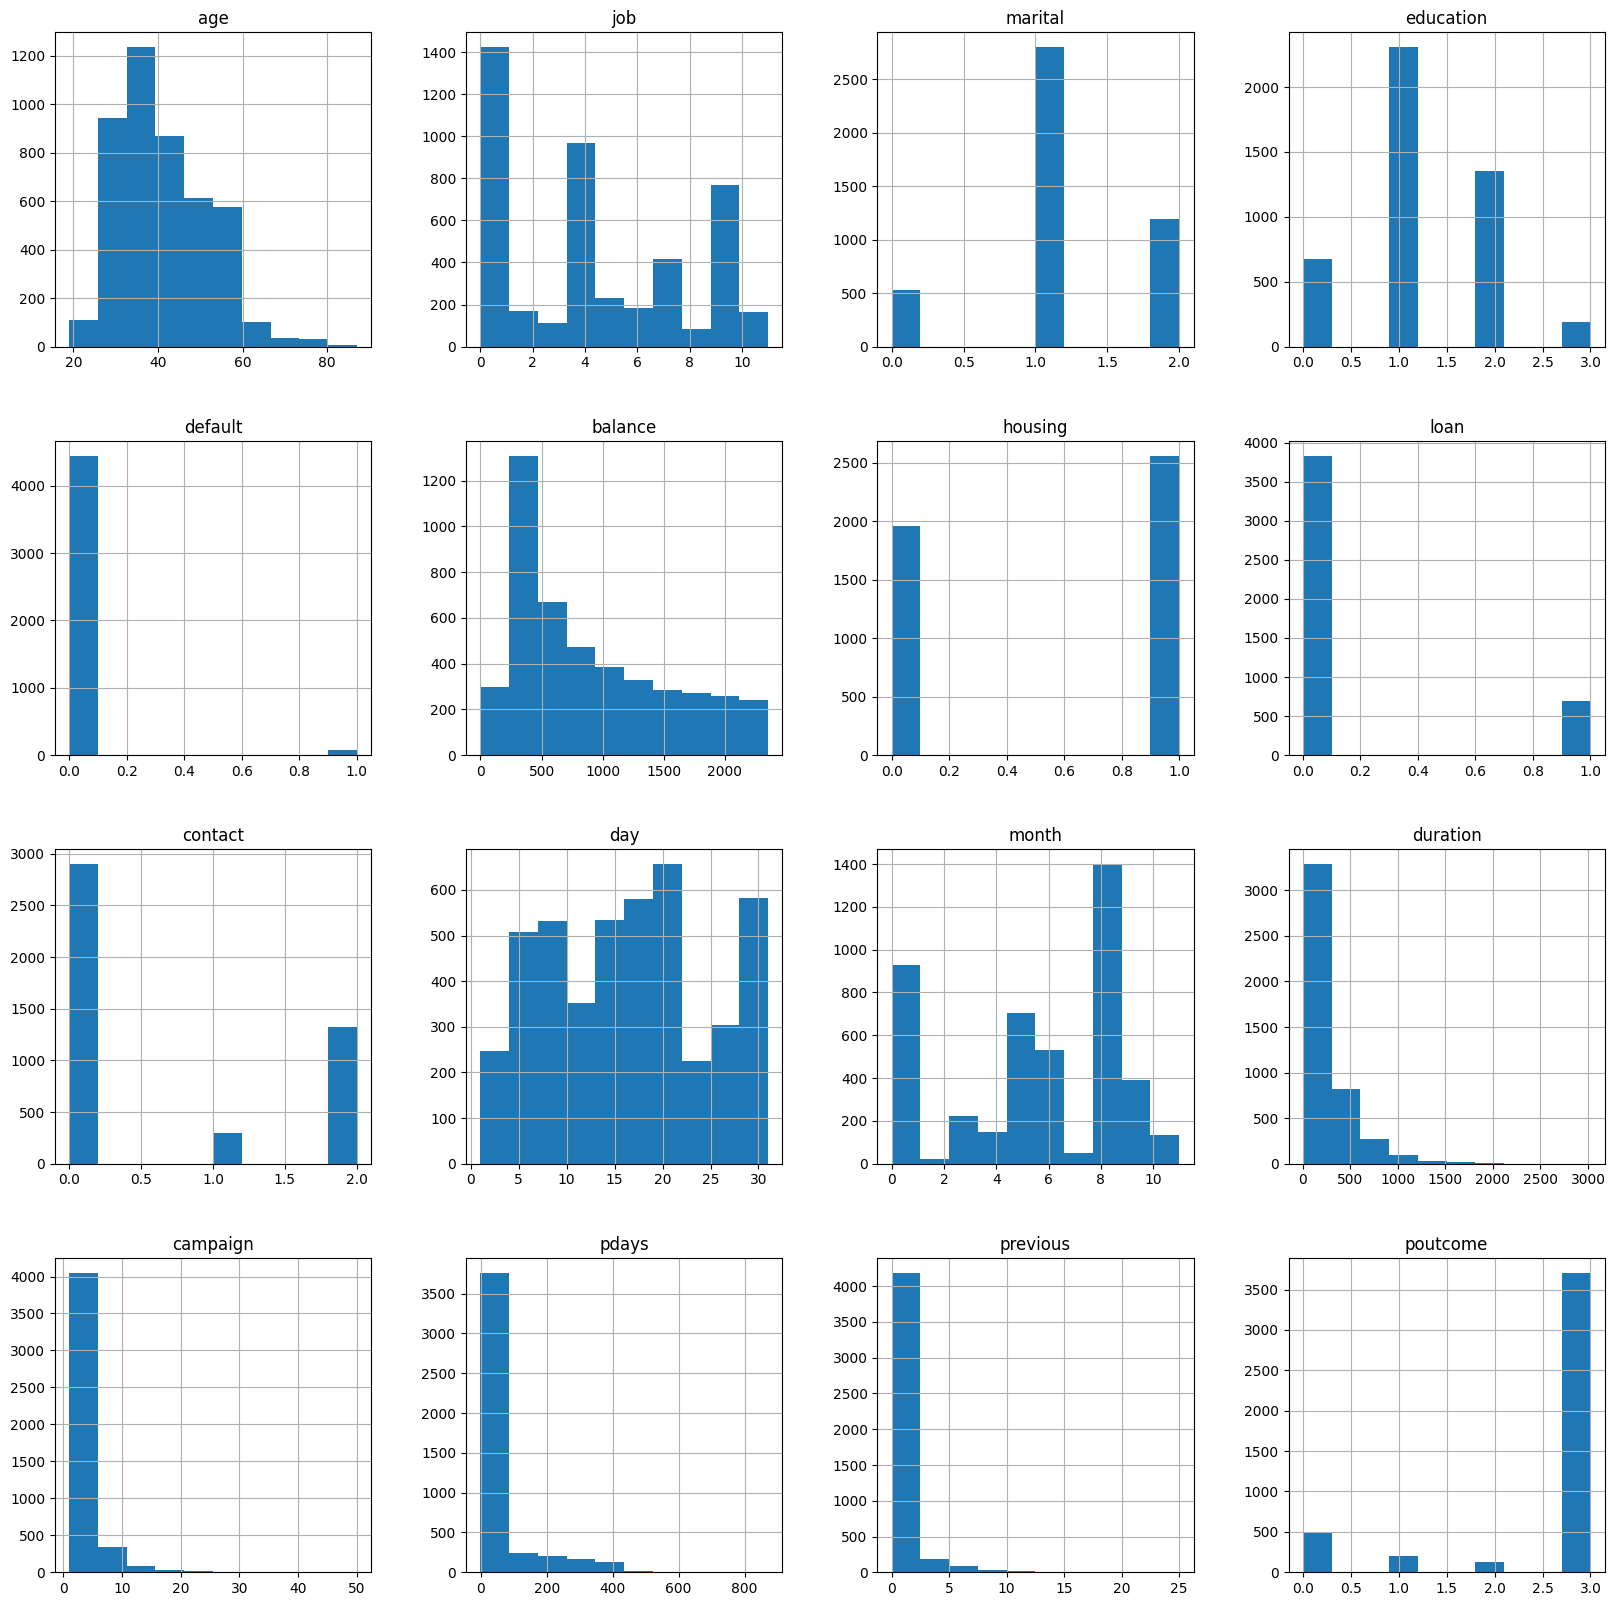

In [16]:
df.hist(figsize = (20,20))

In [31]:
import seaborn as sns  # Correct import
import matplotlib.pyplot as plt  # To display the heatmap

In [33]:
pip install seaborn


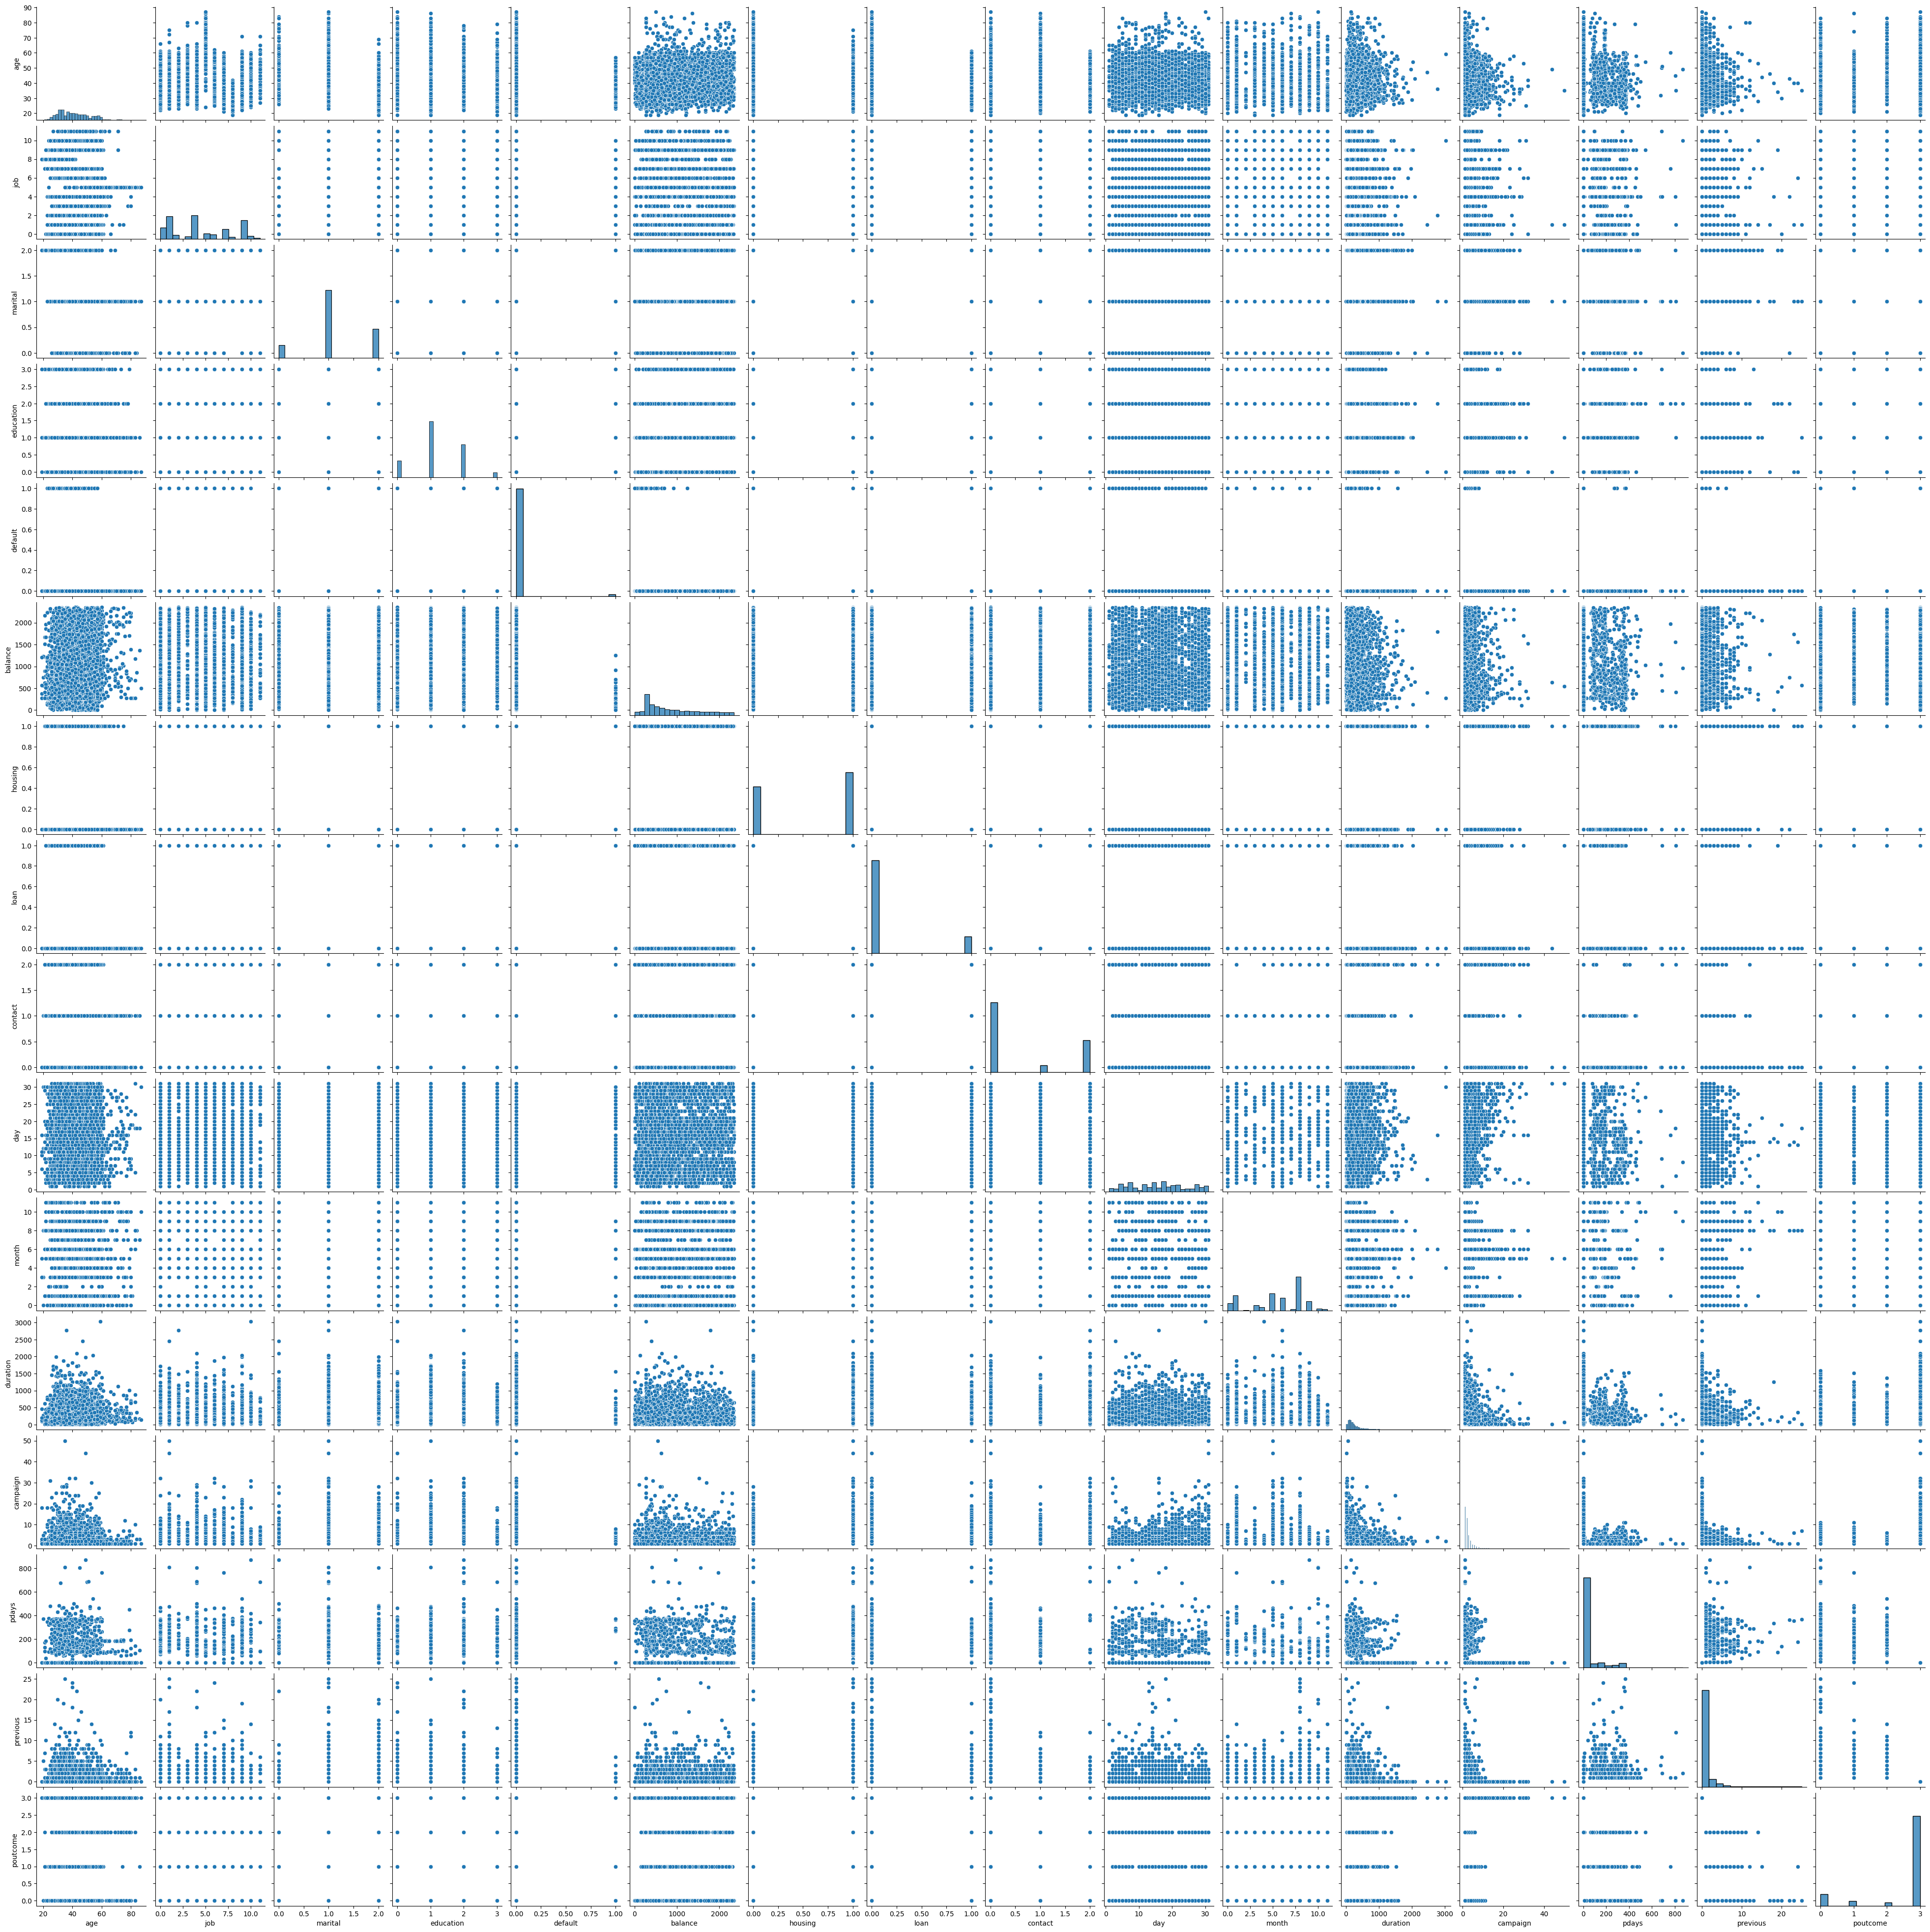

In [36]:
# Create the pairplot
sns.pairplot(df)

In [17]:
# Splitting features (X) and the target (y)

X = df.drop('y', axis=1)
y = df['y']

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,10,1,0,0,1475,0,0,0,19,10,79,1,-1,0,3
1,33,7,1,1,0,2030,1,1,0,11,8,220,1,339,4,0
2,35,4,2,2,0,1303,1,0,0,16,0,185,1,330,1,0
3,30,4,1,2,0,1352,1,1,2,3,6,199,4,-1,0,3
4,59,1,1,1,0,274,1,0,2,5,8,226,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,119,1,0,0,30,5,329,5,-1,0,3
4517,57,6,1,2,1,0,1,1,2,9,8,153,1,-1,0,3
4518,57,9,1,1,0,558,0,0,0,19,1,151,11,-1,0,3
4519,28,1,1,1,0,1187,0,0,0,6,3,129,4,211,3,1


In [20]:
y

,y
0,no
1,no
2,no
3,no
4,no
...,...
4516,no
4517,no
4518,no
4519,no


In [21]:
# Create a DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [22]:
# Predicting on the test set
y_pred = dt_classifier.predict(X_test)


In [23]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
print(confusion_matrix(y_test, y_pred))

# Classification Report
print(classification_report(y_test, y_pred))


Accuracy: 0.8615
[[1110   95]
 [  93   59]]
              precision    recall  f1-score   support

          no       0.92      0.92      0.92      1205
         yes       0.38      0.39      0.39       152

    accuracy                           0.86      1357
   macro avg       0.65      0.65      0.65      1357
weighted avg       0.86      0.86      0.86      1357



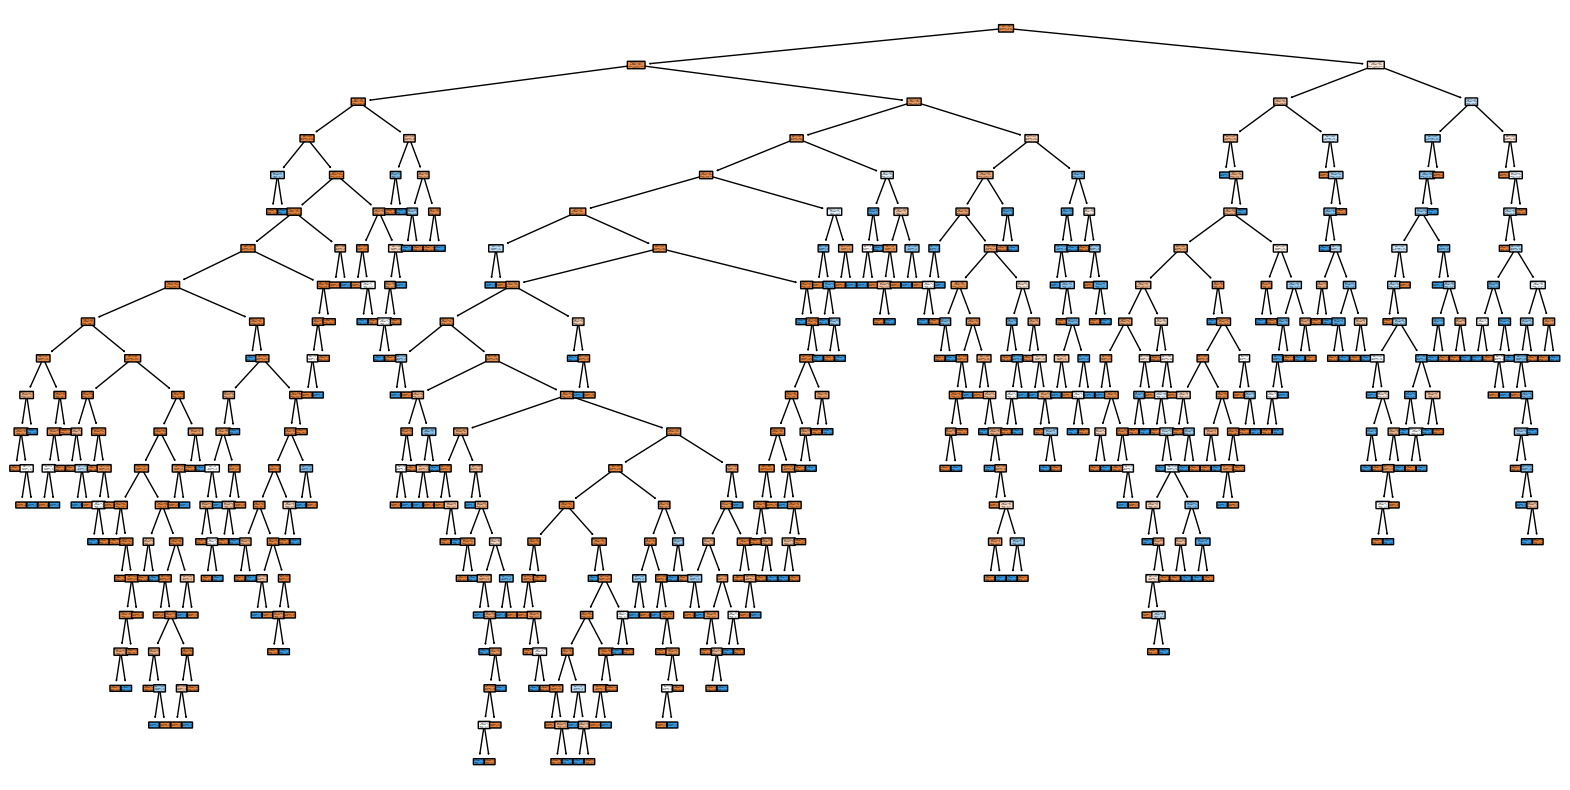

In [24]:
from sklearn import tree
import matplotlib.pyplot as plt

# Plotting the decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], rounded=True)
plt.show()
